**simple neural network using Micrograd for data classification**

In [3]:
!pip install micrograd

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from micrograd.engine import Value
from micrograd.nn import MLP


In [4]:
# Constants
LEARNING_RATE = 0.1
REGULARIZATION_STRENGTH = 1e-4
BATCH_SIZE = None  # Set to None for full batch

In [6]:
#Load and process dataset
def load_data():
    X, y = make_moons(n_samples=100, noise=0.1)
    y = y * 2 - 1
    return X, y

In [7]:
#Create and initialize the neural network model
def initialize_model():
    model = MLP(2, [16, 16, 1])  # 2-layer neural network
    return model

In [8]:
def calculate_loss(model, X, y):
    """
    Calculate the loss function for the given model, data, and labels.

    Args:
        model (MLP): The neural network model.
        X (numpy.ndarray): Input data.
        y (numpy.ndarray): Target labels.

    Returns:
        float: Total loss value.
        float: Accuracy of predictions.
    """
    if BATCH_SIZE is None:
        X_batch, y_batch = X, y
    else:
        random_indices = np.random.permutation(X.shape[0])[:BATCH_SIZE]
        X_batch, y_batch = X[random_indices], y[random_indices]

    # Convert input data to Value objects for automatic differentiation
    inputs = [list(map(Value, x_row)) for x_row in X_batch]

    # Forward pass to calculate scores
    scores = list(map(model, inputs))

    # Calculate SVM loss
    losses = [(1 + -y_i * score_i).relu() for y_i, score_i in zip(y_batch, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))

    # L2 regularization
    reg_loss = REGULARIZATION_STRENGTH * sum((p * p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # Calculate accuracy
    accuracy = [(y_i > 0) == (score_i.data > 0) for y_i, score_i in zip(y_batch, scores)]

    return total_loss, sum(accuracy) / len(accuracy)

In [9]:
def optimize(model, X, y, learning_rate):
    """
    Optimize the model using stochastic gradient descent (SGD).

    Args:
        model (MLP): The neural network model.
        X (numpy.ndarray): Input data.
        y (numpy.ndarray): Target labels.
        learning_rate (float): Learning rate for SGD.
    """
    # Forward pass and compute loss
    total_loss, acc = calculate_loss(model, X, y)

    # Backward pass to compute gradients
    model.zero_grad()
    total_loss.backward()

    # Update model parameters using SGD
    for p in model.parameters():
        p.data -= learning_rate * p.grad

In [10]:
def plot_decision_boundary(model, X, y):
    """
    Visualize the decision boundary of the model.

    Args:
        model (MLP): The trained neural network model.
        X (numpy.ndarray): Input data.
        y (numpy.ndarray): Target labels.
    """
    h = 0.25
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    inputs = [list(map(Value, x_row)) for x_row in X_mesh]
    scores = list(map(model, inputs))
    Z = np.array([s.data > 0 for s in scores])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

Epoch 0: Loss 0.7791482059390118, Accuracy 81.0%
Epoch 1: Loss 0.5110591318664096, Accuracy 83.0%
Epoch 2: Loss 0.3874527353410874, Accuracy 84.0%
Epoch 3: Loss 0.34419694501764836, Accuracy 87.0%
Epoch 4: Loss 0.3198885508929445, Accuracy 86.0%
Epoch 5: Loss 0.29857337028099196, Accuracy 85.0%
Epoch 6: Loss 0.2929369831499483, Accuracy 86.0%
Epoch 7: Loss 0.28796292664836187, Accuracy 86.0%
Epoch 8: Loss 0.2838692785086445, Accuracy 86.0%
Epoch 9: Loss 0.28010978129558, Accuracy 86.0%
Epoch 10: Loss 0.2765423877884479, Accuracy 86.0%
Epoch 11: Loss 0.2730070308557748, Accuracy 88.0%
Epoch 12: Loss 0.2701114491820974, Accuracy 87.0%
Epoch 13: Loss 0.2672591869755745, Accuracy 88.0%
Epoch 14: Loss 0.26486562072609865, Accuracy 87.0%
Epoch 15: Loss 0.2626133632536333, Accuracy 88.0%
Epoch 16: Loss 0.2607333103945341, Accuracy 88.0%
Epoch 17: Loss 0.25899885235816916, Accuracy 88.0%
Epoch 18: Loss 0.25771971836523844, Accuracy 88.0%
Epoch 19: Loss 0.25615851458114386, Accuracy 88.0%
Epoch

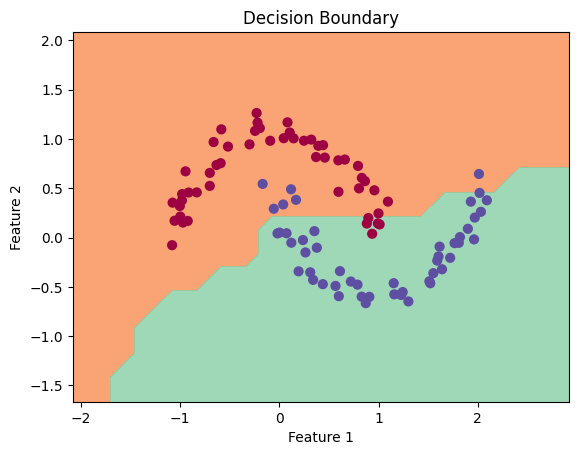

In [11]:
def main():
    # Load data
    X, y = load_data()

    # Initialize the model
    model = initialize_model()

    # Training loop
    for epoch in range(100):
        # Calculate loss and optimize
        optimize(model, X, y, LEARNING_RATE)

        # Logging progress
        total_loss, acc = calculate_loss(model, X, y)
        print(f"Epoch {epoch}: Loss {total_loss.data}, Accuracy {acc * 100}%")

    # Visualize decision boundary
    plot_decision_boundary(model, X, y)

if __name__ == "__main__":
    main()